In [1]:
import pandas as pd
import io

In [2]:
data = '''PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.05,,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.275,,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome) ",female,55,0,0,248706,16,,S
17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.125,,Q
18,1,2,"Williams, Mr. Charles Eugene",male,,0,0,244373,13,,S
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",female,31,1,0,345763,18,,S
20,1,3,"Masselmani, Mrs. Fatima",female,,0,0,2649,7.225,,C
21,0,2,"Fynney, Mr. Joseph J",male,35,0,0,239865,26,,S
22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13,D56,S
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,,Q
24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5,A6,S
25,0,3,"Palsson, Miss. Torborg Danira",female,8,3,1,349909,21.075,,S
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)",female,38,1,5,347077,31.3875,,S
27,0,3,"Emir, Mr. Farred Chehab",male,,0,0,2631,7.225,,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263,C23 C25 C27,S
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,,0,0,330959,7.8792,,Q
30,0,3,"Todoroff, Mr. Lalio",male,,0,0,349216,7.8958,,S
31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,PC 17601,27.7208,,C
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,,1,0,PC 17569,146.5208,B78,C
33,1,3,"Glynn, Miss. Mary Agatha",female,,0,0,335677,7.75,,Q
34,0,2,"Wheadon, Mr. Edward H",male,66,0,0,C.A. 24579,10.5,,S
35,0,1,"Meyer, Mr. Edgar Joseph",male,28,1,0,PC 17604,82.1708,,C
36,0,1,"Holverson, Mr. Alexander Oskar",male,42,1,0,113789,52,,S
37,1,3,"Mamee, Mr. Hanna",male,,0,0,2677,7.2292,,C
38,0,3,"Cann, Mr. Ernest Charles",male,21,0,0,A./5. 2152,8.05,,S
39,0,3,"Vander Planke, Miss. Augusta Maria",female,18,2,0,345764,18,,S
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14,1,0,2651,11.2417,,C
41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40,1,0,7546,9.475,,S
42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27,1,0,11668,21,,S
43,0,3,"Kraeff, Mr. Theodor",male,,0,0,349253,7.8958,,C
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3,1,2,SC/Paris 2123,41.5792,,C
45,1,3,"Devaney, Miss. Margaret Delia",female,19,0,0,330958,7.8792,,Q
46,0,3,"Rogers, Mr. William John",male,,0,0,S.C./A.4. 23567,8.05,,S
47,0,3,"Lennon, Mr. Denis",male,,1,0,370371,15.5,,Q
48,1,3,"O'Driscoll, Miss. Bridget",female,,0,0,14311,7.75,,Q
49,0,3,"Samaan, Mr. Youssef",male,,2,0,2662,21.6792,,C
50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18,1,0,349237,17.8,,S
51,0,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.6875,,S
52,0,3,"Nosworthy, Mr. Richard Cater",male,21,0,0,A/4. 39886,7.8,,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C
54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkinson)",female,29,1,0,2926,26,,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65,0,1,113509,61.9792,B30,C
56,1,1,"Woolner, Mr. Hugh",male,,0,0,19947,35.5,C52,S
57,1,2,"Rugg, Miss. Emily",female,21,0,0,C.A. 31026,10.5,,S
58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,,C
59,1,2,"West, Miss. Constance Mirium",female,5,1,2,C.A. 34651,27.75,,S
60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.9,,S
61,0,3,"Sirayanian, Mr. Orsen",male,22,0,0,2669,7.2292,,C
62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
63,0,1,"Harris, Mr. Henry Birkhardt",male,45,1,0,36973,83.475,C83,S
64,0,3,"Skoog, Master. Harald",male,4,3,2,347088,27.9,,S
65,0,1,"Stewart, Mr. Albert A",male,,0,0,PC 17605,27.7208,,C
66,1,3,"Moubarek, Master. Gerios",male,,1,1,2661,15.2458,,C
67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29,0,0,C.A. 29395,10.5,F33,S
68,0,3,"Crease, Mr. Ernest James",male,19,0,0,S.P. 3464,8.1583,,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17,4,2,3101281,7.925,,S
70,0,3,"Kink, Mr. Vincenz",male,26,2,0,315151,8.6625,,S
71,0,2,"Jenkin, Mr. Stephen Curnow",male,32,0,0,C.A. 33111,10.5,,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16,5,2,CA 2144,46.9,,S
73,0,2,"Hood, Mr. Ambrose Jr",male,21,0,0,S.O.C. 14879,73.5,,S
74,0,3,"Chronopoulos, Mr. Apostolos",male,26,1,0,2680,14.4542,,C
75,1,3,"Bing, Mr. Lee",male,32,0,0,1601,56.4958,,S
76,0,3,"Moen, Mr. Sigurd Hansen",male,25,0,0,348123,7.65,F G73,S
77,0,3,"Staneff, Mr. Ivan",male,,0,0,349208,7.8958,,S
78,0,3,"Moutal, Mr. Rahamin Haim",male,,0,0,374746,8.05,,S
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,,S
80,1,3,"Dowdell, Miss. Elizabeth",female,30,0,0,364516,12.475,,S
81,0,3,"Waelens, Mr. Achille",male,22,0,0,345767,9,,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29,0,0,345779,9.5,,S
83,1,3,"McDermott, Miss. Brigdet Delia",female,,0,0,330932,7.7875,,Q
84,0,1,"Carrau, Mr. Francisco M",male,28,0,0,113059,47.1,,S
85,1,2,"Ilett, Miss. Bertha",female,17,0,0,SO/C 14885,10.5,,S
86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gustafsson)",female,33,3,0,3101278,15.85,,S
87,0,3,"Ford, Mr. William Neal",male,16,1,3,W./C. 6608,34.375,,S
88,0,3,"Slocovski, Mr. Selman Francis",male,,0,0,SOTON/OQ 392086,8.05,,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,19950,263,C23 C25 C27,S
90,0,3,"Celotti, Mr. Francesco",male,24,0,0,343275,8.05,,S
91,0,3,"Christmann, Mr. Emil",male,29,0,0,343276,8.05,,S
92,0,3,"Andreasson, Mr. Paul Edvin",male,20,0,0,347466,7.8542,,S
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46,1,0,W.E.P. 5734,61.175,E31,S
94,0,3,"Dean, Mr. Bertram Frank",male,26,1,2,C.A. 2315,20.575,,S
95,0,3,"Coxon, Mr. Daniel",male,59,0,0,364500,7.25,,S
96,0,3,"Shorney, Mr. Charles Joseph",male,,0,0,374910,8.05,,S
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
98,1,1,"Greenfield, Mr. William Bertram",male,23,0,1,PC 17759,63.3583,D10 D12,C
99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34,0,1,231919,23,,S'''

In [3]:
file = io.StringIO(data)
df = pd.read_csv(file)

### **Our data ...**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Categorical Data**

### **Countplot**

<Axes: xlabel='Survived', ylabel='count'>

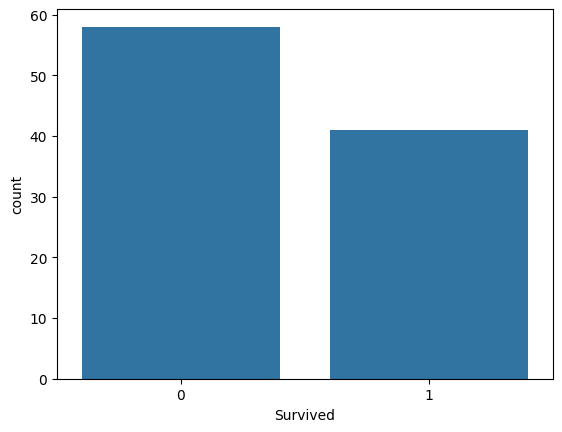

In [5]:
import seaborn as sb
sb.countplot(x='Survived', data=df)

<Axes: xlabel='Embarked', ylabel='count'>

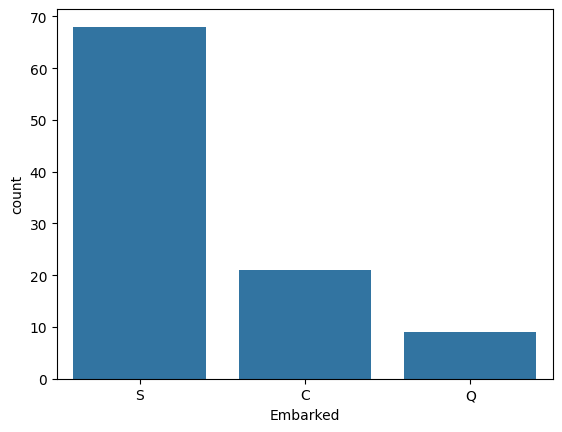

In [6]:
sb.countplot(x='Embarked', data=df)

### **Pie chart**

<Axes: ylabel='count'>

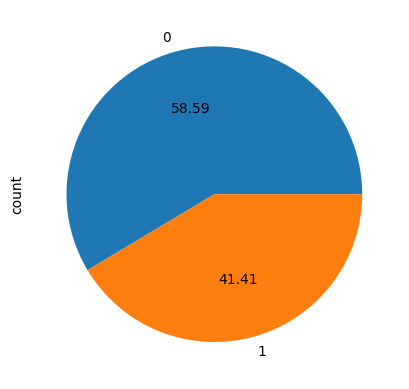

In [7]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

### **Numerical data**

### **Histogram**

(array([ 6.,  2.,  2.,  3.,  7.,  9.,  7., 10.,  8.,  6.,  4.,  3.,  2.,
         1.,  0.,  2.,  2.,  0.,  2.,  1.]),
 array([ 0.83  ,  4.3385,  7.847 , 11.3555, 14.864 , 18.3725, 21.881 ,
        25.3895, 28.898 , 32.4065, 35.915 , 39.4235, 42.932 , 46.4405,
        49.949 , 53.4575, 56.966 , 60.4745, 63.983 , 67.4915, 71.    ]),
 <BarContainer object of 20 artists>)

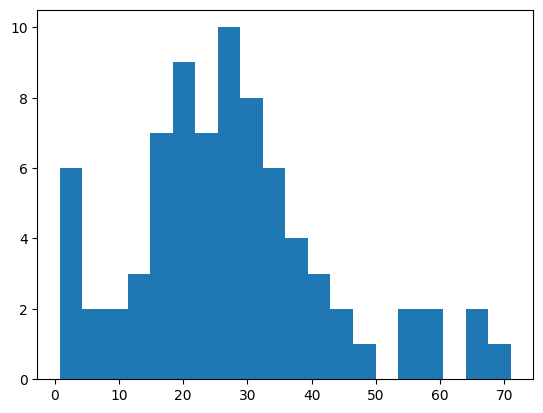

In [11]:
import matplotlib.pyplot as plot
plot.hist(x='Age', data=df, bins=20)

### **Distplot**

<Axes: xlabel='Age', ylabel='Count'>

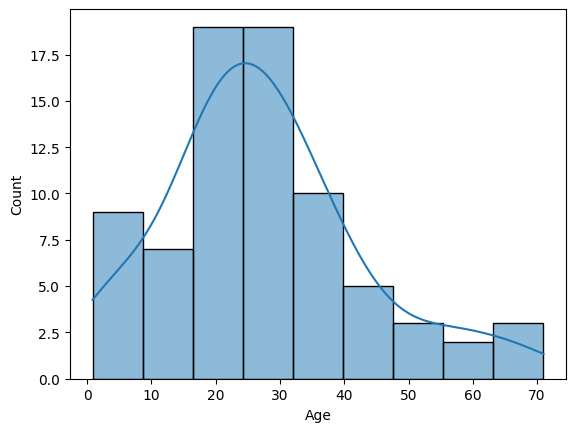

In [12]:
sb.histplot(data=df, kde=True, x='Age')

### **Boxplot**

<Axes: xlabel='Age'>

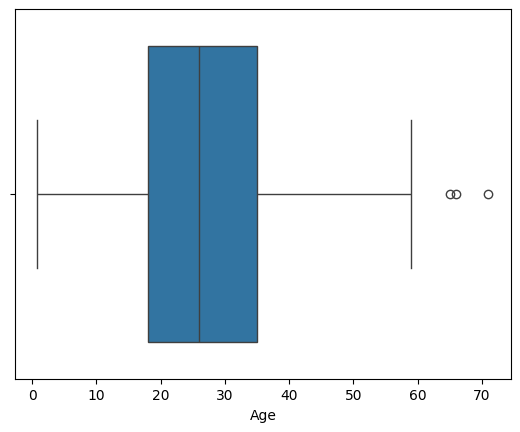

In [13]:
sb.boxplot(data=df, x='Age')